In [273]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # reading images
from skimage.color import rgb2gray # converting rgb images to grayscale
import cv2

save = False

### Step 1: Detecting/Tracking the position of parking space(s)

**Step 1**: Gray-Scale

**Step 2**: Apply Gaussian Blur to the image to reduce noise.

**Step 3**: Canny

**Step 4**: Hough Lines

[[ 25 211 565 211]]
25 211 565 211
checking: 25 565 25 565
[[ 24 195 591 195]]
24 195 591 195
checking: 24 591 25 565
[[ 25 210 611 210]]
25 210 611 210
checking: 25 611 24 591
[[ 24 196 559 196]]
24 196 559 196
checking: 24 559 25 611
[[503 322 503  90]]
503 322 503 90
checking: 503 503 24 559
[[324 314 324  87]]
324 314 324 87
checking: 324 324 503 503
line is vertical
[[563 310 563   0]]
563 310 563 0
checking: 563 563 324 324
line is vertical
[[ 84 301  87  85]]
84 301 87 85
checking: 84 87 563 563
[[205 316 205  93]]
205 316 205 93
checking: 205 205 84 87
[[564 309 564   0]]
564 309 564 0
checking: 564 564 205 205
line is vertical
[[384 294 384  85]]
384 294 384 85
checking: 384 384 564 564
line is vertical
[[504 298 504  87]]
504 298 504 87
checking: 504 504 384 384
line is vertical
[[ 24 322  27  98]]
24 322 27 98
checking: 24 27 504 504
[[265 272 265  85]]
265 272 265 85
checking: 265 265 24 27
[[145 321 145 147]]
145 321 145 147
checking: 145 145 265 265
line is vertical
[[ 24

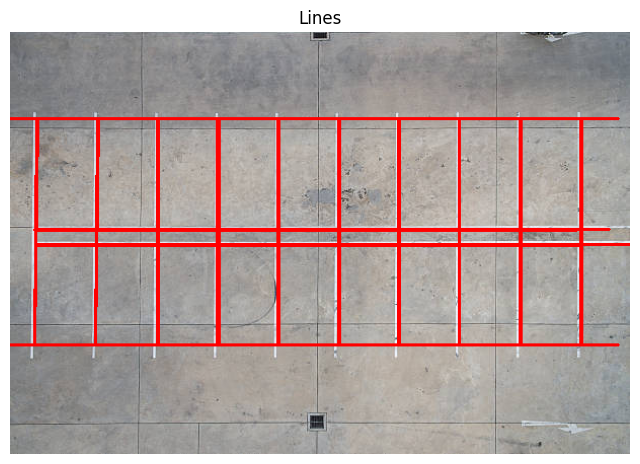

In [274]:
img1 = mpimg.imread('images\lot_empty.jpg')
img1_sliced = img1[:,:,:3]

img1_gray = cv2.cvtColor(img1_sliced, cv2.COLOR_BGR2GRAY)
img1_blur = cv2.GaussianBlur(img1_gray, (5, 5), 1.505)
img1_canny = cv2.Canny(img1_blur, 50, 150)


""" plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Gaussian Blur')
plt.imshow(img1_blur, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Canny')
plt.imshow(img1_canny, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()
 """

# Attempt to remove double lines with kernel and dilation and eroding
kernel = np.ones((4,4),np.uint8)
img1_canny = cv2.dilate(img1_canny, kernel, iterations=2)
img1_canny = cv2.erode(img1_canny, kernel, iterations=3)


lines = cv2.HoughLinesP(image=img1_canny, rho=1, theta=np.pi/180, threshold=75, minLineLength=15, maxLineGap=90)
line_image = np.copy(img1)
# @@@@@@@@@@@@ DRAWING LINES AFTER MODIFYING COORDINATES
heightsTop = []
heightsBot = []

count = 0
prevLine = lines[0]
threshold = 30
for line in lines:
    for x1, y1, x2, y2 in line:
        print(line)
        print(x1, y1, x2, y2)
        # cv2.line(line_image, (x1, y1), (x2, y2), (255, 0 , 0), 2)
        # y1 is higher?
        print('checking:',x1,x2,prevLine[0][0],prevLine[0][2])
        if (x1 == x2 and prevLine[0][0] == prevLine[0][2]):
          # is vertical and prevLine is vertical
          print("line is vertical")
          heightsBot.append(y1)
          heightsTop.append(y2)
          # cv2.line(line_image, (x1, y1), (prevLine[0][0], prevLine[0][1]), (255, 0 , 0), 2)
          # cv2.line(line_image, (x2, y2), (prevLine[0][0], prevLine[0][3]), (255, 0 , 0), 2)
    prevLine = line
    # count+=1
    # if (count ==15):
      # break

# print(heightsBot)
median = int(np.median(heightsTop))
median2 = int(np.median(heightsBot))
cv2.line(line_image, (0, median), (600, median), (255, 0 , 0), 2)
cv2.line(line_image, (0, median2), (600, median2), (255, 0 , 0), 2)


for i in range(len(lines)):
    # print('t')
    for x1, y1, x2, y2 in lines[i]:
        print('before:',lines[i])
        if (abs(lines[i][0][0] - lines[i][0][2]) < 4):
          # line[0][1] = median2
          lines[i][0][1] = median2
          lines[i][0][3] = median
          print('     after:',line)
        cv2.line(line_image, (x1, lines[i][0][1]), (x2, lines[i][0][3]), (255, 0 , 0), 2)
    
#Transparent image kinda with lines
lines_edges = cv2.addWeighted(img1, 0.8, line_image, 1, 0)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Lines')
plt.imshow(line_image, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()



### Step 2: Identify if there is a car in the parking space(s)